# Import

In [6]:
import pyiast
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import time
import os
import scipy.optimize as optim
import matplotlib.pyplot as plt

#df_NAME=pd.read_csv("HEAT_0215.csv")
df_NAME=pd.read_csv("HEAT_0413.csv")


bins_CO2 = []
bins_H2S = []
ccc = 0
for nam in df_NAME["NAME"]:
    print(nam)
    f_tmp = open("iso_"+nam+"_saved.bin",'rb')
    bin_tmp = np.array(pickle.load(f_tmp))
    #print(ccc)
    #print(bin_tmp)

    bins_CO2.append(bin_tmp[[False, True, True]]) ## Pick 1 = CO2, 2 = CH4 

    f_tmp.close()
    ccc = ccc + 1
ccc = 0
summm = 0
for nam in df_NAME["NAME"]:
    f_tmp = open("iso_"+nam+"_saved.bin",'rb') ## 0 = H2S , 1 = CO2, 2 = CH4
    bin_tmp = np.array(pickle.load(f_tmp))
    #print(ccc)
    #print(bin_tmp)
    summm = summm + len(bin_tmp)
    bins_H2S.append(bin_tmp[[True, False, True]]) ## Pick 0 = H2S and 2 = CH4

    f_tmp.close()
    ccc = ccc + 1
    
print('Total isotherm fittings = ',summm )
print('ouf of ', 3*len(df_NAME["NAME"].to_numpy()))
    
Names_CO2=df_NAME["NAME"].to_numpy()
Names_H2S=df_NAME["NAME"].to_numpy()
dH_CO2 = np.array([df_NAME["CO2_Heat"], df_NAME["CH4_Heat"]]).T
dH_H2S = np.array([df_NAME["H2S_Heat"],df_NAME["CH4_Heat"]]).T


IWR-1
LTL-2
MOR-1
SEW-1
Total isotherm fittings =  12
ouf of  12


# Function: iso_mix

In [8]:
Arrh = lambda T,dH ,T_ref: np.exp(-dH/8.3145*(1/T - 1/T_ref)) # Arrhenius equation (Clasius-Clapeyron Equation)

## Isothermal mixture isotherm
def iso_mix(P_par, T, iso_list, dH_list,Tref_list):
    P_norm = []
    for (p,dh,tref) in zip(P_par, dH_list,Tref_list):
        p_n = Arrh(T,dh,tref)*p 
        P_norm.append(p_n)
    P_norm_arr = np.array(P_norm)
    #print(P_norm_mat.T)
    if P_norm_arr.ndim > 1:
        for i in range(len(P_norm[0])):
            p_tmp = P_norm_arr[i,:]
            p_tmp[p_tmp<0.000001] = 0.000001
            q_IAST_tmp = pyiast.iast(p_tmp,
                                     iso_list,
                                     warningoff=True)
    else:
        try:
            p_tmp = P_norm_arr
            p_tmp[p_tmp<0.000001] = 0.000001
            #print(p_tmp)
            q_IAST_tmp = pyiast.iast(p_tmp,
                                    iso_list,
                                     warningoff=True)
        except:    
            try:
                #print('Initial guess error with P = ',P_par)
                x_IG = np.ones(len(p_tmp))/len(p_tmp)
                q_IAST_tmp = pyiast.iast(p_tmp,
                                        iso_list,adsorbed_mole_fraction_guess = x_IG,
                                        warningoff=True)
            except:
                try:
                    arg_min = np.argmin(p_tmp)
                    p_tmp[p_tmp<0.000001] = 0.000001
                    x_IG = 0.05*np.ones(len(p_tmp))
                    x_IG[arg_min] = 1 - 0.05*(len(p_tmp)-1)
                    #print(x_IG)
                    q_IAST_tmp = pyiast.iast(p_tmp,
                                            iso_list,adsorbed_mole_fraction_guess = x_IG,
                                            warningoff=True)

                except:
                    try:
                        arg_max = np.argmax(p_tmp)
                        p_tmp[p_tmp<0.000001] = 0.000001
                        x_IG = 0.05*np.ones(len(p_tmp))
                        x_IG[arg_max] = 1 - 0.05*(len(p_tmp)-1)
                        #print(x_IG)
                        q_IAST_tmp = pyiast.iast(p_tmp,
                                                iso_list,adsorbed_mole_fraction_guess = x_IG,
                                                warningoff=True)        
                    except:
                        try:
                            arg_max = np.argmax(p_tmp)
                            p_tmp[p_tmp<0.000001] = 0.000001
                            x_IG = 0.15*np.ones(len(p_tmp))
                            x_IG[arg_max] = 1 - 0.15*(len(p_tmp)-1)
                            #print(x_IG)
                            q_IAST_tmp = pyiast.iast(p_tmp,
                                                iso_list,adsorbed_mole_fraction_guess = x_IG,
                                                warningoff=True)
                        except:
                            try:
                                arg_min = np.argmin(p_tmp)
                                p_tmp[p_tmp<0.000001] = 0.000001
                                x_IG = 0.01*np.ones(len(p_tmp))
                                x_IG[arg_min] = 1 - 0.01*(len(p_tmp)-1)
                                #print(x_IG)
                                q_IAST_tmp = pyiast.iast(p_tmp,
                                            iso_list,adsorbed_mole_fraction_guess = x_IG,
                                            warningoff=True)

                            except:
                                try:
                                    arg_max = np.argmax(p_tmp)
                                    p_tmp[p_tmp<0.000001] = 0.000001
                                    x_IG = 0.01*np.ones(len(p_tmp))
                                    x_IG[arg_max] = 1 - 0.01*(len(p_tmp)-1)
                                    #print(x_IG)
                                    q_IAST_tmp = pyiast.iast(p_tmp,
                                                    iso_list,adsorbed_mole_fraction_guess = x_IG,
                                                warningoff=True)        
                                except:
                                    p_tmp[p_tmp<0.000001] = 0.000001
                                    arg_invalid = p_tmp < 0.00001
                                    arg_valid = (p_tmp < 0.00001) == False
                                    if np.sum(arg_valid) == 1:
                                        q_IAST_tmp = np.zeros(len(iso_list))
                                        q_IAST_tmp[arg_valid] = iso_list[arg_valid].loading(p_tmp[arg_valid])
                                        q_IAST_tmp[arg_invalid] = 0.00001
                                    else:
                                        x_IG = [0.9999, 0.0001]
                                        #print(x_IG)
                                        q_IAST_tmp = pyiast.iast(
                                            p_tmp,iso_list,
                                            adsorbed_mole_fraction_guess = x_IG,
                                            warningoff=True)
    return q_IAST_tmp

# Selectivity of CO2 case

## 50bar selectivity (CO2/CH4)

IWR-1
LTL-2
MOR-1
SEW-1


(0.0, 6.5)

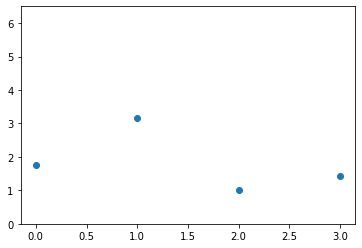

In [9]:
isoo = bins_CO2[0]
P_h_sel = 50
y_f_sel = 0.5 ### CO2 mole fraction

sel_IAST_CO2 = []
for isoo,nana,dhdh in zip(bins_CO2, Names_CO2,dH_CO2):
    iast_res = iso_mix(np.array([y_f_sel, 1-y_f_sel])*P_h_sel, ## partial pressure
    343,isoo,dhdh*1000,[298.15,298.15])
    #iast_res = pyiast.iast(np.array([y_f_sel, 1-y_f_sel])*P_h_sel, isoo)
    sel_tmp = iast_res[0]/iast_res[1]*(1-y_f_sel)/y_f_sel 
    sel_IAST_CO2.append(sel_tmp)
    print(nana)
sel_IAST_CO2 = np.array(sel_IAST_CO2)
plt.plot(sel_IAST_CO2, 'o')
plt.ylim([0, 6.5])

## 1bar selectivity (CO2/CH4)

IWR-1
LTL-2
MOR-1
SEW-1


(0.0, 6.5)

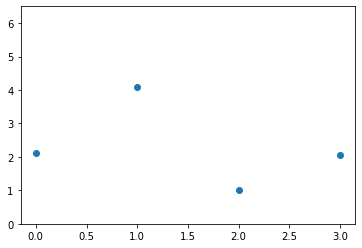

In [10]:
isoo = bins_CO2[0]
P_h_sel = 1
y_f_sel = 0.5 ### CO2 mole fraction

sel_IAST_CO2_1bar = []
for isoo,nana,dhdh in zip(bins_CO2, Names_CO2,dH_CO2):
    iast_res = iso_mix(np.array([y_f_sel, 1-y_f_sel])*P_h_sel, ## partial pressure
    343,isoo,dhdh*1000,[298.15,298.15])
    #iast_res = pyiast.iast(np.array([y_f_sel, 1-y_f_sel])*P_h_sel, isoo)
    sel_tmp = iast_res[0]/iast_res[1]*(1-y_f_sel)/y_f_sel 
    sel_IAST_CO2_1bar.append(sel_tmp)
    print(nana)
sel_IAST_CO2_1bar = np.array(sel_IAST_CO2_1bar)
plt.plot(sel_IAST_CO2_1bar, 'o')
plt.ylim([0, 6.5])

## Save the data (CO2/CH4 selectivities)

In [12]:
di_CO2 = {'NAME': Names_CO2,
         'CO2/CH4 selectivity': sel_IAST_CO2}
df_CO2 = pd.DataFrame(di_CO2)
df_CO2.to_csv('IAST_selectivit_CO2_50bar.csv',index = False)

In [13]:
di_CO2_1bar = {'NAME': Names_CO2,
         'CO2/CH4 selectivity': sel_IAST_CO2_1bar}
df_CO2_1bar = pd.DataFrame(di_CO2_1bar)
df_CO2_1bar.to_csv('IAST_selectivit_CO2_1bar.csv',index = False)

# Selectivity of H2S case

## 50bar selectivity (H2S/CH4)

IWR-1
LTL-2
MOR-1
SEW-1


(0.0, 6.5)

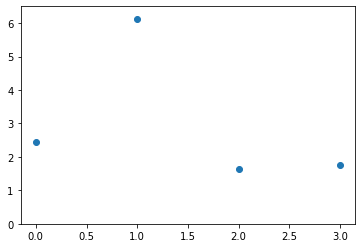

In [14]:
isoo = bins_H2S[0]
P_h_sel = 50
y_f_sel = 0.5 ### CO2 mole fraction

sel_IAST_H2S = []
for isoo,nana,dhdh in zip(bins_H2S, Names_H2S,dH_H2S):
    iast_res = iso_mix(np.array([y_f_sel, 1-y_f_sel])*P_h_sel, ## partial pressure
    343,isoo,dhdh*1000,[298.15,298.15])
    #iast_res = pyiast.iast(np.array([y_f_sel, 1-y_f_sel])*P_h_sel, isoo)
    sel_tmp = iast_res[0]/iast_res[1]*(1-y_f_sel)/y_f_sel 
    sel_IAST_H2S.append(sel_tmp)
    print(nana)
sel_IAST_H2S = np.array(sel_IAST_H2S)
plt.plot(sel_IAST_H2S, 'o')
plt.ylim([0, 6.5])

## 1bar selectivity (H2S/CH4)

IWR-1
LTL-2
MOR-1
SEW-1


(0.0, 6.5)

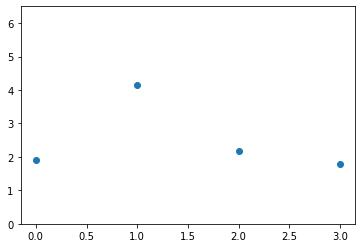

In [15]:
isoo = bins_H2S[0]
P_h_sel = 1
y_f_sel = 0.5 ### CO2 mole fraction

sel_IAST_H2S_1bar = []
for isoo,nana,dhdh in zip(bins_H2S, Names_H2S,dH_H2S):
    iast_res = iso_mix(np.array([y_f_sel, 1-y_f_sel])*P_h_sel, ## partial pressure
    343,isoo,dhdh*1000,[298.15,298.15])
    #iast_res = pyiast.iast(np.array([y_f_sel, 1-y_f_sel])*P_h_sel, isoo)
    sel_tmp = iast_res[0]/iast_res[1]*(1-y_f_sel)/y_f_sel 
    sel_IAST_H2S_1bar.append(sel_tmp)
    print(nana)
sel_IAST_H2S_1bar = np.array(sel_IAST_H2S_1bar)
plt.plot(sel_IAST_H2S_1bar, 'o')
plt.ylim([0, 6.5])

## Save the data (H2S/CH4 selectivities)

In [16]:
di_H2S = {'NAME': Names_H2S,
         'H2S/CH4 selectivity': sel_IAST_H2S}
df_H2S = pd.DataFrame(di_H2S)
df_H2S.to_csv('IAST_selectivit_H2S_50bar.csv',index = False)

In [17]:
di_H2S_1bar = {'NAME': Names_H2S,
         'H2S/CH4 selectivity': sel_IAST_H2S_1bar}
df_H2S_1bar = pd.DataFrame(di_H2S_1bar)
df_H2S_1bar.to_csv('IAST_selectivit_H2S_1bar.csv',index = False)